In [126]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import itertools
import spacy
import nltk
%matplotlib inline

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [131]:
# dataframe display options
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)

# Grid-Searching Hyperparameters
+ Logistic Regression
+ Multinomial Naive Bayes
+ Support Vector Machines


## Logistic Regression

In [60]:
lr_pipe = Pipeline([('vect', CountVectorizer(tokenizer= custom_tokenizer, stop_words=s_words)),
                    ('lr', LogisticRegression(multi_class='multinomial', solver='newton-cg'))])

In [61]:
param_grid = {'vect__binary': [True, False],
    'vect__ngram_range': [(1,1),(1,2),(1,3)],
              'vect__min_df': [i for i in range(1,5)],
              'lr__C': [0.01, 0.1, 1, 10, 100],
             'lr__class_weight':['balanced', None],}

In [62]:
grid = GridSearchCV(lr_pipe, 
                    param_grid, 
                    cv=5,
                    verbose=True,
                    scoring='accuracy')
grid.fit(X_train.ravel(), y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  9.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({...ty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'vect__binary': [True, False], 'vect__min_df': [1, 2, 3, 4], 'lr__class_weight': ['balanced', None], 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)], 'lr__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [68]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.65


In [69]:
print(grid.best_params_)

{'vect__binary': True, 'vect__min_df': 1, 'vect__ngram_range': (1, 1), 'lr__class_weight': None, 'lr__C': 1}


In [70]:
print("Vectorization step:\n{}".format( grid.best_estimator_.named_steps["vect"]))

Vectorization step:
CountVectorizer(analyzer='word', binary=True, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'whole', 'whom', 'her', 'hence', 'one', 'seeming', 'between', 'five', 'am', 'she', 'because', 'sometimes', 'though', 'out', 'themselves', 'has', 'them', 'becoming', 'everyone', 'while', 'there', 'by', 'nobody', 'hers', 'also', 'top', 'might', 'amongst', 'three', 'often', 'fire'...', 'namely', 'formerly', 'against', 'must', 'meanwhile', 'ever', 'become', 'everywhere', 'fdghjkl'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<function custom_tokenizer at 0x1181311e0>,
        vocabulary=None)


In [71]:
print("Logistic regression step:\n{}".format( grid.best_estimator_.named_steps["lr"]))

Logistic regression step:
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


In [72]:
pred = grid.predict(X_test.ravel())
print("Classification report on test set for classifier:")
print(classification_report(y_test, pred))  # target_names=news_test.target_names

Classification report on test set for classifier:
                  precision    recall  f1-score   support

     baby shower       0.54      0.70      0.61        10
   company event       0.51      0.80      0.62        56
      conference       0.62      0.53      0.57        15
   kids birthday       0.85      0.90      0.87       108
life celebration       0.64      0.41      0.50        39
           other       0.50      0.41      0.45        22
  portrait shoot       0.61      0.48      0.54        23
   private party       0.41      0.32      0.36        41
         wedding       0.40      0.15      0.22        13

     avg / total       0.63      0.64      0.62       327



In [73]:
accuracy_score(y_test, pred)

0.63608562691131498

> The accuracy on the hold-out set is 0.64%

In [74]:
cm = confusion_matrix(y_test, pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[ 7  0  0  0  0  0  1  2  0]
 [ 0 45  5  0  1  2  1  2  0]
 [ 0  5  8  0  0  1  0  1  0]
 [ 0  6  0 97  1  0  2  2  0]
 [ 2  7  0  5 16  1  1  5  2]
 [ 1  6  0  2  1  9  2  1  0]
 [ 0  6  0  2  1  2 11  0  1]
 [ 3 13  0  7  3  2  0 13  0]
 [ 0  1  0  1  2  1  0  6  2]]


In [142]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)

In [78]:
v = grid.best_estimator_.named_steps["vect"]
c = grid.best_estimator_.named_steps["lr"]
cls = grid.best_estimator_.named_steps["lr"].classes_

Confusion matrix, without normalization


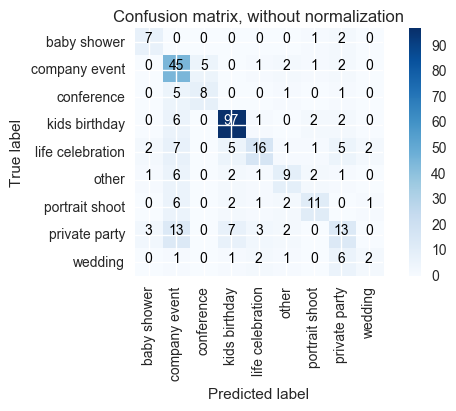

In [79]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=cls,
                      title='Confusion matrix, without normalization')

> It is worth mentioning that category "private party" definition overlaps with "company event" which confuses the model and dirrectly affects accuracy.

### Most informative features

In [80]:
def print_topk(vectorizer, clf, class_labels, n):
    """Prints features with the highest coefficient values, per class"""
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top = np.argsort(clf.coef_[i])[-n:]
        print("[{}] - {}".format(class_label,
              ", ".join(feature_names[j] for j in top)))

In [81]:
print_topk(v, c, cls, 5)

[baby shower] - mom, hall, traditional, baby, shower
[company event] - people, shire, event, tour, holiday
[conference] - speaker, conference, schedule, summit, 2016
[kids birthday] - turn, bday, year, 1st, birthday
[life celebration] - portrait, graduation, baptism, proposal, engagement
[other] - guntupalli, 2015, nilisha, warm, prom
[portrait shoot] - portrait, maternity, session, family, headshot
[private party] - party, birthday, dinner, 40th, 50th
[wedding] - enter, small, super, ceremony, wedding


> I used this information to iteratively clean-up the input vectors

## Multinomial Naive Bayes

In [143]:
mnb_pipe = Pipeline([('vect', CountVectorizer(tokenizer= custom_tokenizer, stop_words=s_words)),
                     ('tfidf', TfidfTransformer()),
                    ('mnb', MultinomialNB())])

In [144]:
mnb_param_grid = {'vect__binary': [True, False],
              'vect__ngram_range': [(1,1),(1,2),(1,3)],
              'vect__min_df': [i for i in range(1,5)],
                  'tfidf__use_idf': [True, False],
              'mnb__alpha': [0.01, 0.1, 0.5, 0.7, 1],
             'mnb__fit_prior':[True, False],}

In [145]:
mnb_grid = GridSearchCV(mnb_pipe, 
                    mnb_param_grid, 
                    cv=5,
                    verbose=True,
                    scoring='accuracy')
mnb_grid.fit(X_train.ravel(), y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=1)]: Done 2400 out of 2400 | elapsed: 13.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({...inear_tf=False, use_idf=True)), ('mnb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'mnb__alpha': [0.01, 0.1, 0.5, 0.7, 1], 'vect__ngram_range': [(1, 1), (1, 2), (1, 3)], 'tfidf__use_idf': [True, False], 'vect__binary': [True, False], 'mnb__fit_prior': [True, False], 'vect__min_df': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [147]:
print("Best cross-validation score: {:.2f}".format(mnb_grid.best_score_))

Best cross-validation score: 0.63


In [148]:
print(mnb_grid.best_params_)

{'mnb__alpha': 0.5, 'vect__ngram_range': (1, 2), 'vect__binary': True, 'tfidf__use_idf': False, 'mnb__fit_prior': False, 'vect__min_df': 3}


In [149]:
print("Multinomial Naive Bayes step:\n{}".format( mnb_grid.best_estimator_.named_steps["mnb"]))

Multinomial Naive Bayes step:
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=False)


In [150]:
mnb_pred = mnb_grid.predict(X_test.ravel())
print("Classification report on test set for classifier:")
print(classification_report(y_test, mnb_pred))  # target_names=news_test.target_names

Classification report on test set for classifier:
                  precision    recall  f1-score   support

     baby shower       0.29      0.70      0.41        10
   company event       0.60      0.71      0.65        56
      conference       0.50      0.80      0.62        15
   kids birthday       0.82      0.91      0.86       108
life celebration       0.62      0.54      0.58        39
           other       0.54      0.32      0.40        22
  portrait shoot       0.57      0.57      0.57        23
   private party       0.47      0.20      0.28        41
         wedding       0.60      0.23      0.33        13

     avg / total       0.64      0.64      0.62       327



In [151]:
accuracy_score(y_test, mnb_pred)

0.63914373088685017

In [152]:
# Compute confusion matrix
mnb_cm = confusion_matrix(y_test, mnb_pred)
np.set_printoptions(precision=2)

Confusion matrix


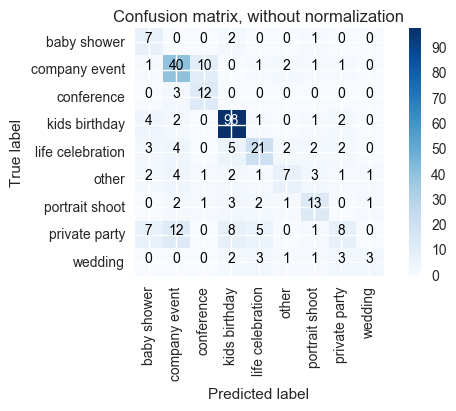

In [153]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(mnb_cm, classes=cls,
                      title='Confusion matrix, without normalization')

### Feature importance

In [155]:
v_mnb = mnb_grid.best_estimator_.named_steps["vect"]
c_mnb = mnb_grid.best_estimator_.named_steps["mnb"]
cls_mnb = mnb_grid.best_estimator_.named_steps["mnb"].classes_

In [156]:
print_topk(v_mnb, c_mnb, cls_mnb, 5)

[baby shower] - event, shot, shower, baby shower, baby
[company event] - 2015, party, photo, shot, event
[conference] - schedule, conference, shot, speaker, 2016
[kids birthday] - birthday party, 1st birthday, 1st, party, birthday
[life celebration] - event, shot, like, engagement, party
[other] - event, prom, 2015, party, shot
[portrait shoot] - session, portrait, shot, photo, family
[private party] - family, shot, photo, birthday, party
[wedding] - shot, photographer, photo, ceremony, wedding


> There are common elements across the classes. This is a good ilustration of how **"photo"** or **"shot"** should be included in the <u>stop_word</u> list

## Support Vector Machines

In [159]:
svm_pipe = Pipeline([('vect', CountVectorizer(tokenizer= custom_tokenizer, stop_words=s_words)),
                     ('tfidf', TfidfTransformer()),
                    ('svm', SVC(kernel='linear'))])

In [160]:
svm_param_grid = {'vect__binary': [True, False],
              'vect__ngram_range': [(1,1),(1,2)],
              'vect__min_df': [i for i in range(1,5)],
                  'tfidf__use_idf': [True, False],
              'svm__C': [ 0.7, 1, 10],
             'svm__kernel':['rbf', 'linear'],
                 'svm__class_weight': ['balanced', None]}

In [161]:
svm_grid = GridSearchCV(svm_pipe, 
                    svm_param_grid, 
                    cv=5,
                    verbose=True,
                    scoring='accuracy')
svm_grid.fit(X_train.ravel(), y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 14.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svm__kernel': ['rbf', 'linear'], 'tfidf__use_idf': [True, False], 'vect__ngram_range': [(1, 1), (1, 2)], 'svm__C': [0.7, 1, 10], 'vect__binary': [True, False], 'vect__min_df': [1, 2, 3, 4], 'svm__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [162]:
print("Best cross-validation score: {:.2f}".format(svm_grid.best_score_))

Best cross-validation score: 0.66


In [163]:
print(svm_grid.best_params_)

{'svm__kernel': 'linear', 'vect__ngram_range': (1, 1), 'svm__class_weight': 'balanced', 'tfidf__use_idf': True, 'vect__binary': True, 'svm__C': 0.7, 'vect__min_df': 1}


In [164]:
print("Support Vector Machine step:\n{}".format( svm_grid.best_estimator_.named_steps["svm"]))

Support Vector Machine step:
SVC(C=0.7, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [166]:
svm_pred = svm_grid.predict(X_test.ravel())
accuracy_score(y_test, svm_pred)

0.64525993883792054

In [167]:
print("Classification report on test set for classifier:")
print(classification_report(y_test, svm_pred))

Classification report on test set for classifier:
                  precision    recall  f1-score   support

     baby shower       0.50      0.60      0.55        10
   company event       0.50      0.73      0.59        56
      conference       0.56      0.67      0.61        15
   kids birthday       0.92      0.86      0.89       108
life celebration       0.61      0.51      0.56        39
           other       0.50      0.41      0.45        22
  portrait shoot       0.65      0.65      0.65        23
   private party       0.39      0.29      0.33        41
         wedding       0.56      0.38      0.45        13

     avg / total       0.65      0.65      0.64       327



In [175]:
# Compute confusion matrix
svm_cm = confusion_matrix(y_test, svm_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization


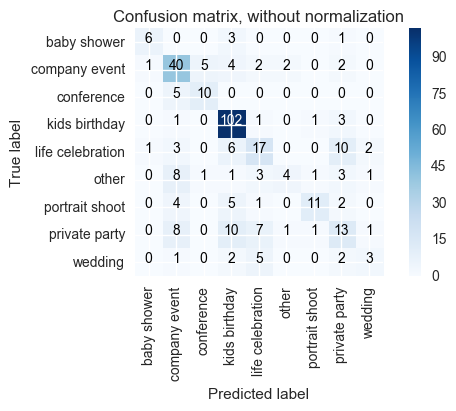

In [176]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(mnb_cm, classes=cls,
                      title='Confusion matrix, without normalization')

### Feature Importance

In [201]:
v_svm = svm_grid.best_estimator_.named_steps["vect"]
c_svm = svm_grid.best_estimator_.named_steps["svm"]
cls_svm = svm_grid.best_estimator_.named_steps["svm"].classes_

In [197]:
print_topk(v_svm, c_svm, cls_svm, 5)

[baby shower] - 
[company event] - 
[conference] - 
[kids birthday] - 
[life celebration] - 
[other] - 
[portrait shoot] - 
[private party] - 
[wedding] - 


In [210]:
c_svm.coef_.toarray().shape

(36, 2751)

> For multiclass problems, the coefficients are a matrix with all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat **non-trivial** as per Sklearn documentation. 
+ [n_class-1, n_SV]
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html